# Personal Information Factor (PIF) - Computing the cell information gain (CIG)

The PIF tries to answer the question: 

_"Knowing everything about a person but one feature's value, what's the information one would gain learning that value?"_

The information gain is a measure of how unexpected the value is. The higher the information gain, the more unusual the value is, given the values for all remaining features.

We compute the information gain as the KL-divergence between the distribution of values of the whole dataset (the features' priors) and the distribution of a feature's values given all remaining features' values (posterior). 

In [1]:
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tutorial_helpers import horizontal_bar_plot

## Example dataset
We define a toy dataset to explain the process. Feel free the modify the dataset and examine the behaviour of the corrresponding CIG values.

In [2]:
data = {'gender': (['male'] * 6)+['female'], 
        'name': ['Anton', 'Bill', 'Charlie', 'Don', 'Emil', 'Emil', 'Charlie'], 
        'eye_color': ['blue', 'green', 'green', 'green', 'blue', 'green', 'green']}
df = pd.DataFrame(data)
df

,gender,name,eye_color
0,male,Anton,blue
1,male,Bill,green
2,male,Charlie,green
3,male,Don,green
4,male,Emil,blue
5,male,Emil,green
6,female,Charlie,green


## The features' priors
Looking at the dataset as a whole, what is the distribution of the values of each feature.
Not having any information about a person, this is what we expect him/her to look like.

In [3]:
from piflib.data_util import calculate_distribution

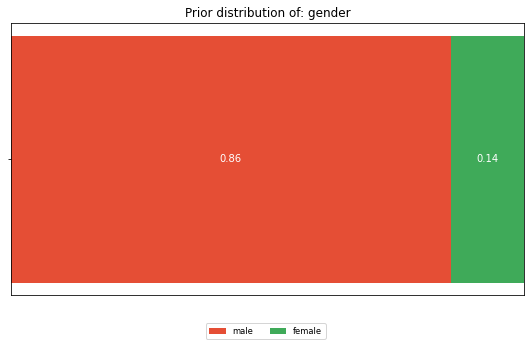

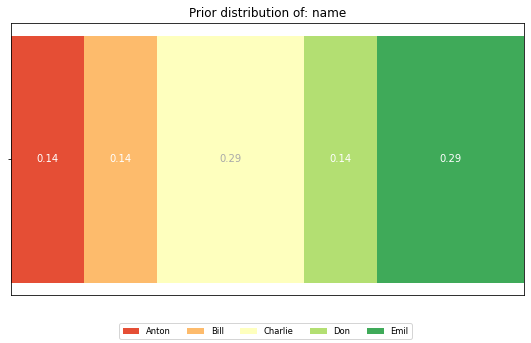

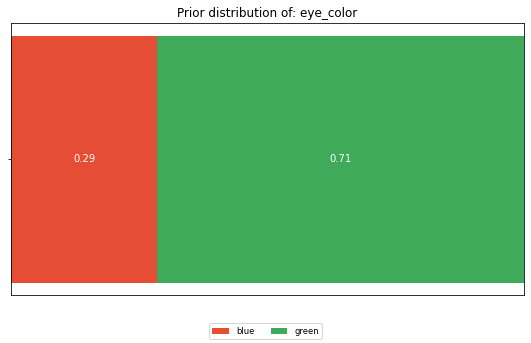

In [4]:
for feature in df.columns:
    dist = calculate_distribution(df[feature])
    horizontal_bar_plot({'': list(dist.values())}, dist.keys())
    plt.title(f'Prior distribution of: {feature}')

## The posterior distributions

To compute a feature's posterior distribution, we have to take its context into account. 
For example, in the given dataset, there are two posterior distributions for the feature 'name'. One where the pair gender and eye color is "male, green" and one for "male, blue".

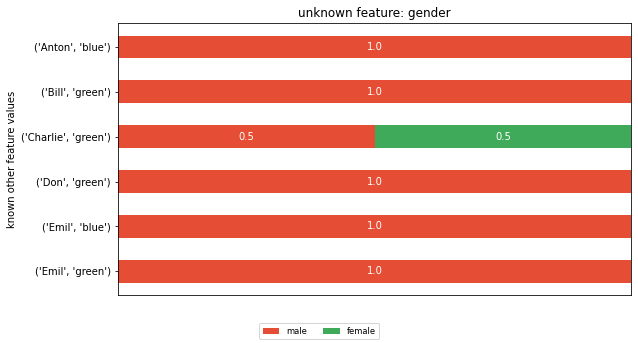

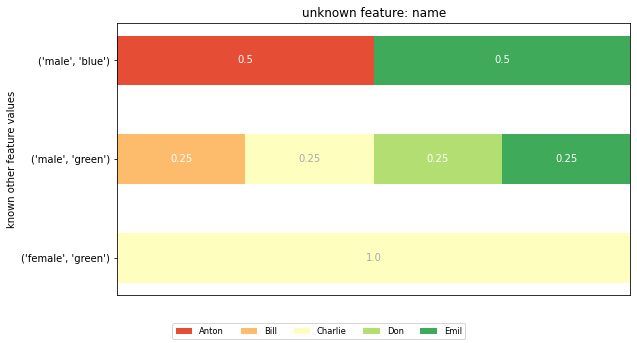

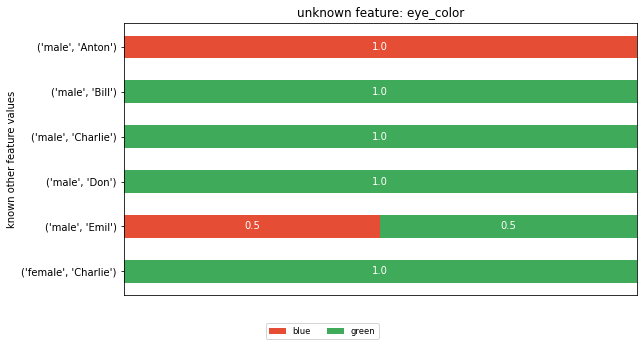

In [5]:
for feature in df.columns:
    known_features = tuple(col_name for col_name in df.columns if col_name != feature)
    bucket = collections.defaultdict(list)
    bucket_map = []
    for idx, row in df.iterrows():
        key = tuple(row[known_feature] for known_feature in known_features)
        bucket[key].append(row[feature])
        bucket_map.append(key)

    bucket_distributions = {key: calculate_distribution(el_bucket) for key, el_bucket in bucket.items()}
    feature_vals = df[feature].unique()
    dists = {}
    for key, distribution in bucket_distributions.items():
        dists[str(key)] = [distribution.get(feature_val, 0) for feature_val in feature_vals]

    horizontal_bar_plot(dists, feature_vals)
    plt.title(f'unknown feature: {feature}')
    plt.ylabel('known other feature values')
    plt.show()

## The CIG values:
Given a features' prior and posterior distributions, one can compute the KL-divergence between the two for each cell in the dataset. This will form the CIG value.

In [6]:
from piflib.pif_calculator import compute_cigs
compute_cigs(df).round(2)

,gender,name,eye_color
0,0.22,1.31,1.81
1,0.22,0.31,0.49
2,0.51,0.31,0.49
3,0.22,0.31,0.49
4,0.22,1.31,0.15
5,0.22,0.31,0.15
6,0.51,1.81,0.49


explain a bit
